**2.1 TIỀN XỬ LÝ DỮ LIỆU**

Import

In [1]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

Đọc dữ liệu

In [2]:
data = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv", header=0)
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Thông tin về dữ liệu

In [3]:
# Ý nghĩa của các đặc trưng

data_dictionary = {
    "Column Name": ["Gender", "Age", "Height", "Weight", 
                    "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O",
                    "SCC", "FAF", "TUE", "CALC", "MTRANS", "NObeyesdad"
                    ],
    "Type": ["Feature, Categorical", "Feature, Continuous", "Feature, Continuous", 
             "Feature, Continuous", "Feature, Binary", "Feature, Binary", 
             "Feature, Integer", "Feature, Continuous", "Feature, Categorical", "Feature, Binary",
             "Feature, Continuous", "Feature, Binary", "Feature, Continuous", "Feature, Integer", 
             "Feature, Categorical", "Feature, Categorical", "Target, Categorical"],
    "Description": [
        "Gender",
        "Age",
        "Height",
        "Weight",
        "Has a family member suffered or suffers from overweight?",
        "Do you eat high caloric food frequently?",
        "Do you usually eat vegetables in your meals?",
        "How many main meals do you have daily?",
        "Do you eat any food between meals?",
        "Do you smoke?",
        "How much water do you drink daily?",
        "Do you monitor the calories you eat daily?",
        "How often do you have physical activity?",
        "How much time do you use technological devices such as cell phone, videogames, television, computer and others?",
        "How often do you drink alcohol?",
        "Which transportation do you usually use?",
        "Obesity level"
    ]
}

df_dict = pd.DataFrame(data_dictionary)
print(tabulate(df_dict, headers="keys"))

    Column Name                     Type                  Description
--  ------------------------------  --------------------  ---------------------------------------------------------------------------------------------------------------
 0  Gender                          Feature, Categorical  Gender
 1  Age                             Feature, Continuous   Age
 2  Height                          Feature, Continuous   Height
 3  Weight                          Feature, Continuous   Weight
 4  family_history_with_overweight  Feature, Binary       Has a family member suffered or suffers from overweight?
 5  FAVC                            Feature, Binary       Do you eat high caloric food frequently?
 6  FCVC                            Feature, Integer      Do you usually eat vegetables in your meals?
 7  NCP                             Feature, Continuous   How many main meals do you have daily?
 8  CAEC                            Feature, Categorical  Do you eat any food between mea

In [4]:
# Số lượng các giá trị khác biệt trong từng đặc trưng

data.nunique()

Age                               1402
Gender                               2
Height                            1574
Weight                            1525
CALC                                 4
FAVC                                 2
FCVC                               810
NCP                                635
SCC                                  2
SMOKE                                2
CH2O                              1268
family_history_with_overweight       2
FAF                               1190
TUE                               1129
CAEC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [5]:
# Số lượng của mỗi giá trị trong các đặc trưng

for col in data.columns:
    print(f'The column:{col}\nvalues_count:\n{data[col].value_counts()}\n\n')

The column:Age
values_count:
Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: count, Length: 1402, dtype: int64


The column:Gender
values_count:
Gender
Male      1068
Female    1043
Name: count, dtype: int64


The column:Height
values_count:
Height
1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: count, Length: 1574, dtype: int64


The column:Weight
values_count:
Weight
80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.472641     1
Name: count, Length: 1525, dtype: int64


The column:CALC
values_count:
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dty

In [6]:
# gender calc caec mtrans

# one hot
data_encoded = pd.get_dummies(data, columns=['Gender', 'CALC', 'CAEC', 'MTRANS'], drop_first=True)

# label encoder
label_encoder = LabelEncoder()
cols_to_encode = ['FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'NObeyesdad']

for col in cols_to_encode:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

# print(data_encoded.head())
data_encoded.head()


,Age,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,...,CALC_Frequently,CALC_Sometimes,CALC_no,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,0,170,477,0,0,549,1,...,False,False,True,False,True,False,False,False,True,False
1,21.0,1.52,56.0,0,809,477,1,1,1267,1,...,False,True,False,False,True,False,False,False,True,False
2,23.0,1.80,77.0,0,170,477,0,0,549,1,...,True,False,False,False,True,False,False,False,True,False
3,27.0,1.80,87.0,0,809,477,0,0,549,0,...,True,False,False,False,True,False,False,False,False,True
4,22.0,1.78,89.8,0,170,0,0,0,549,0,...,False,True,False,False,True,False,False,False,True,False


In [ ]:
data_encoded.head()
data = data_encoded

In [8]:
# Thực hiện chuyển dữ liệu về dạng phù hợp

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

data.head()

,Age,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,...,CALC_Frequently,CALC_Sometimes,CALC_no,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,0,170,477,0,0,549,1,...,False,False,True,False,True,False,False,False,True,False
1,21.0,1.52,56.0,0,809,477,1,1,1267,1,...,False,True,False,False,True,False,False,False,True,False
2,23.0,1.80,77.0,0,170,477,0,0,549,1,...,True,False,False,False,True,False,False,False,True,False
3,27.0,1.80,87.0,0,809,477,0,0,549,0,...,True,False,False,False,True,False,False,False,False,True
4,22.0,1.78,89.8,0,170,0,0,0,549,0,...,False,True,False,False,True,False,False,False,True,False


In [9]:
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']
y = y.to_numpy()

In [10]:
X.head()

,Age,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,...,CALC_Frequently,CALC_Sometimes,CALC_no,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,0,170,477,0,0,549,1,...,False,False,True,False,True,False,False,False,True,False
1,21.0,1.52,56.0,0,809,477,1,1,1267,1,...,False,True,False,False,True,False,False,False,True,False
2,23.0,1.80,77.0,0,170,477,0,0,549,1,...,True,False,False,False,True,False,False,False,True,False
3,27.0,1.80,87.0,0,809,477,0,0,549,0,...,True,False,False,False,True,False,False,False,False,True
4,22.0,1.78,89.8,0,170,0,0,0,549,0,...,False,True,False,False,True,False,False,False,True,False


In [11]:
y

array([1, 1, 1, ..., 4, 4, 4])

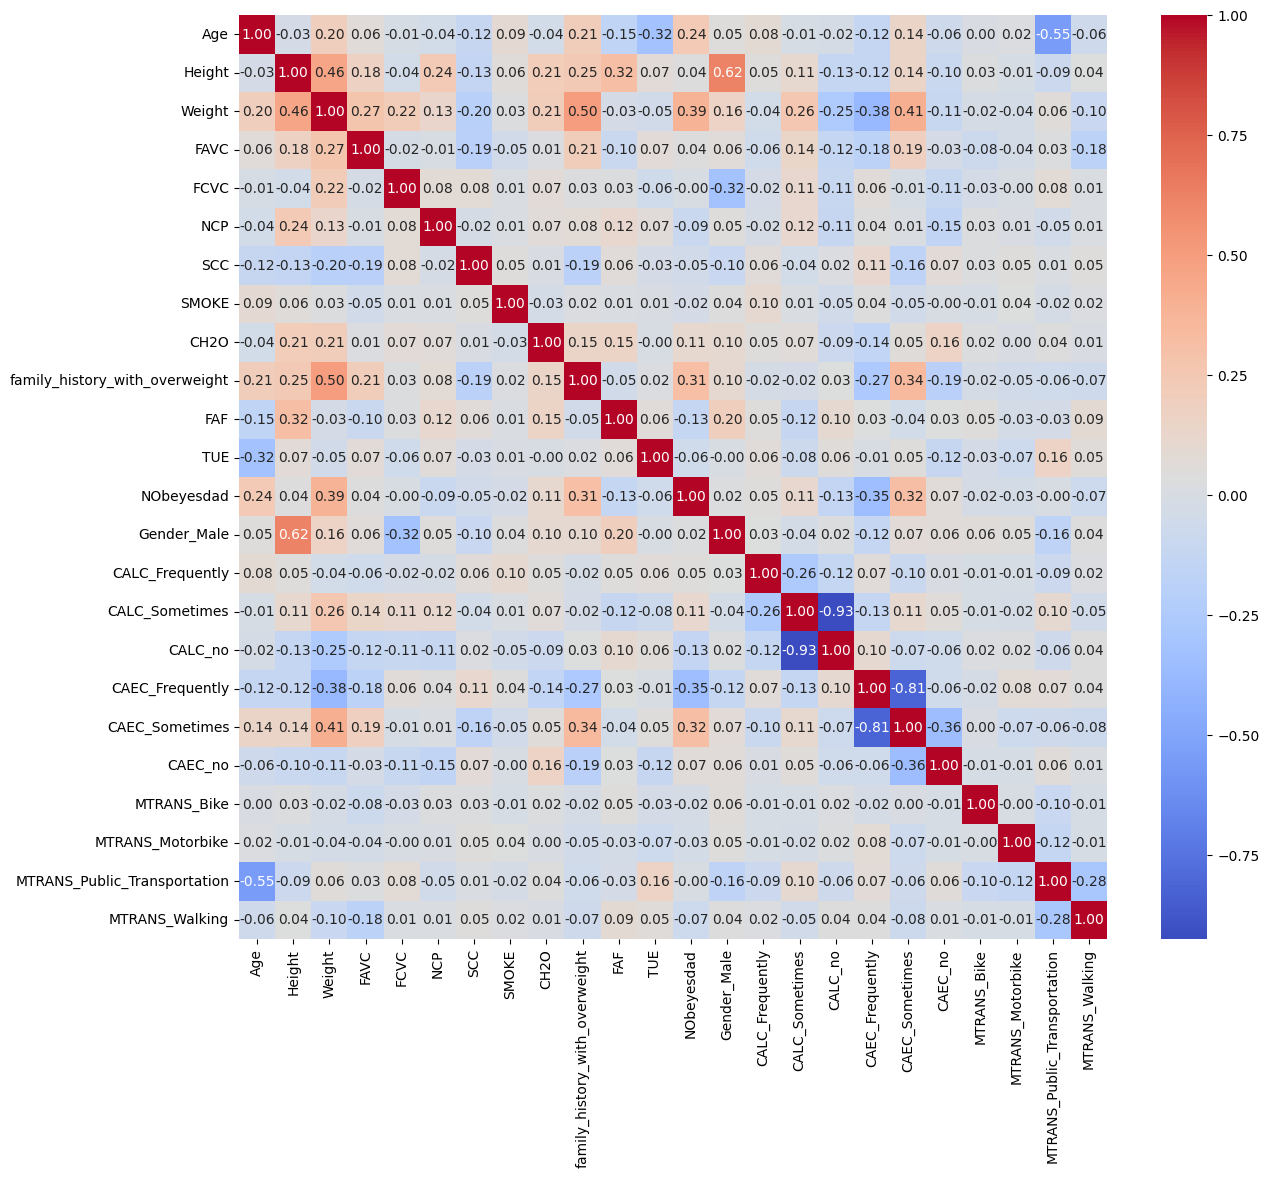

In [20]:
# Ma trận tương quan

correlation_matrix = data.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


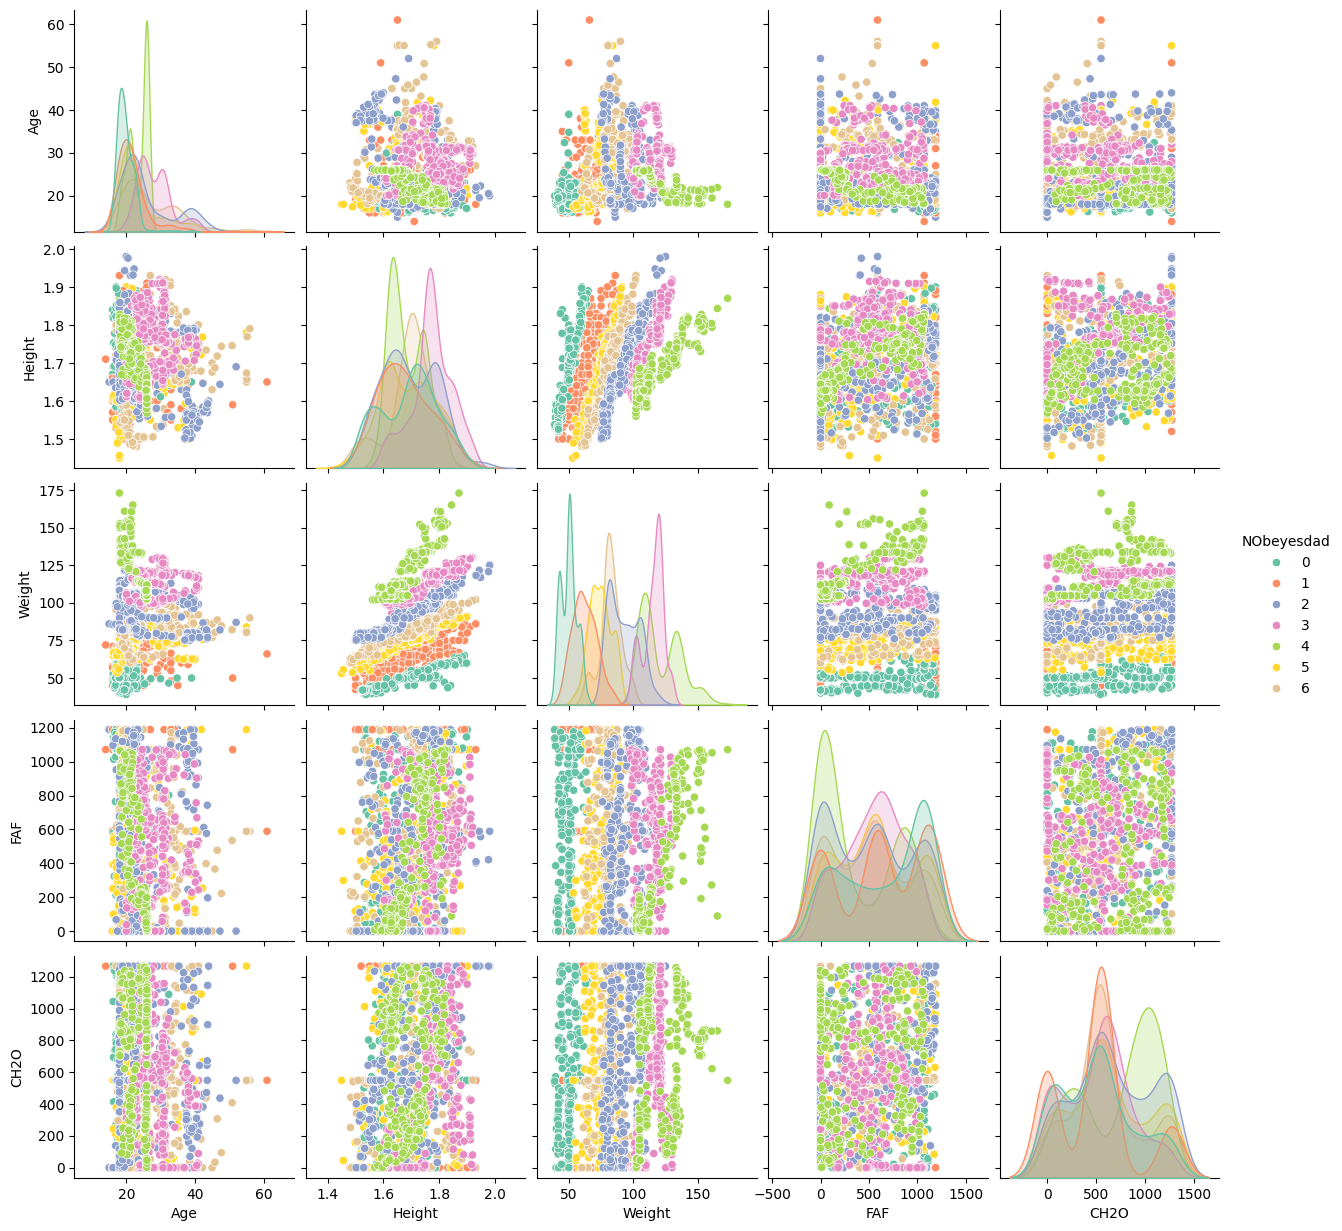

In [13]:
features = ['Age', 'Height', 'Weight', 'FAF', 'CH2O', 'NObeyesdad']

# Create a pair plot, coloring by the target variable 'NObeyesdad'
sns.pairplot(data[features], hue='NObeyesdad', diag_kind='kde', palette='Set2')

In [14]:
# Lưu dữ liệu sang file csv

X.to_csv('D:/HUS_22001541/MachineLearning/Project/data/X_data.csv', index=False)
pd.DataFrame(y).to_csv('D:/HUS_22001541/MachineLearning/Project/data/y_data.csv', index=False)

**2.2 PHÂN TÍCH VÀ TRỰC QUAN HÓA DỮ LIỆU**

In [15]:
# Chuẩn hóa dữ liệu
    
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.52212439, -0.87558934, -0.86255819, ..., -0.07237469,
         0.57972058, -0.16507758],
       [-0.52212439, -1.94759928, -1.16807699, ..., -0.07237469,
         0.57972058, -0.16507758],
       [-0.20688898,  1.05402854, -0.36609013, ..., -0.07237469,
         0.57972058, -0.16507758],
       ...,
       [-0.28190933,  0.54167211,  1.79886776, ..., -0.07237469,
         0.57972058, -0.16507758],
       [ 0.00777624,  0.40492652,  1.78577968, ..., -0.07237469,
         0.57972058, -0.16507758],
       [-0.10211908,  0.39834438,  1.7905916 , ..., -0.07237469,
         0.57972058, -0.16507758]])

In [16]:
# Giảm chiều dữ liệu

pca = PCA(n_components=6)  # Trích xuất 6 thành phần chính
X_pca = pca.fit_transform(X_scaled)

In [17]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report
# import pandas as pd

# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# svm_model = SVC(kernel='rbf')  # Sử dụng kernel RBF (Radial Basis Function)
# svm_model.fit(X_train, y_train)

# y_pred = svm_model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# print(classification_report(y_test, y_pred))